# 1.2 Análise Univariada


**Objetivo:** Analisar distribuição e características individuais de cada variável

## Importação de Bibliotecas

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos Dados

In [20]:
data_path = Path('../data/raw/Cardiovascular_Disease_Dataset.csv')
df = pd.read_csv(data_path)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

Dataset: 1000 linhas x 14 colunas


## ANÁLISE DE DISTRIBUIÇÃO - VARIÁVEIS NUMÉRICAS


Inicialmente, as variáveis foram separadas em **contínuas** e **discretas**, permitindo uma análise exploratória mais detalhada e adequada às características estatísticas de cada grupo.

In [21]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [22]:

# Variaveis continuas
continuous_vars = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

# Variaveis discretas 
discrete_vars = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 
                 'exerciseangia', 'slope', 'noofmajorvessels', 'target']



### Variáveis Continuas

Para a análise das variáveis contínuas, foram plotados histogramas acompanhados de curvas de densidade (*Kernel Density Estimation*, KDE), com o objetivo de avaliar a distribuição dos dados, verificar a presença de assimetria e identificar possíveis desvios em relação a uma distribuição aproximadamente normal.

Além disso, foram adicionadas linhas de referência correspondentes à média e à mediana, permitindo uma comparação visual entre medidas de tendência central e facilitando a identificação de distribuições assimétricas.

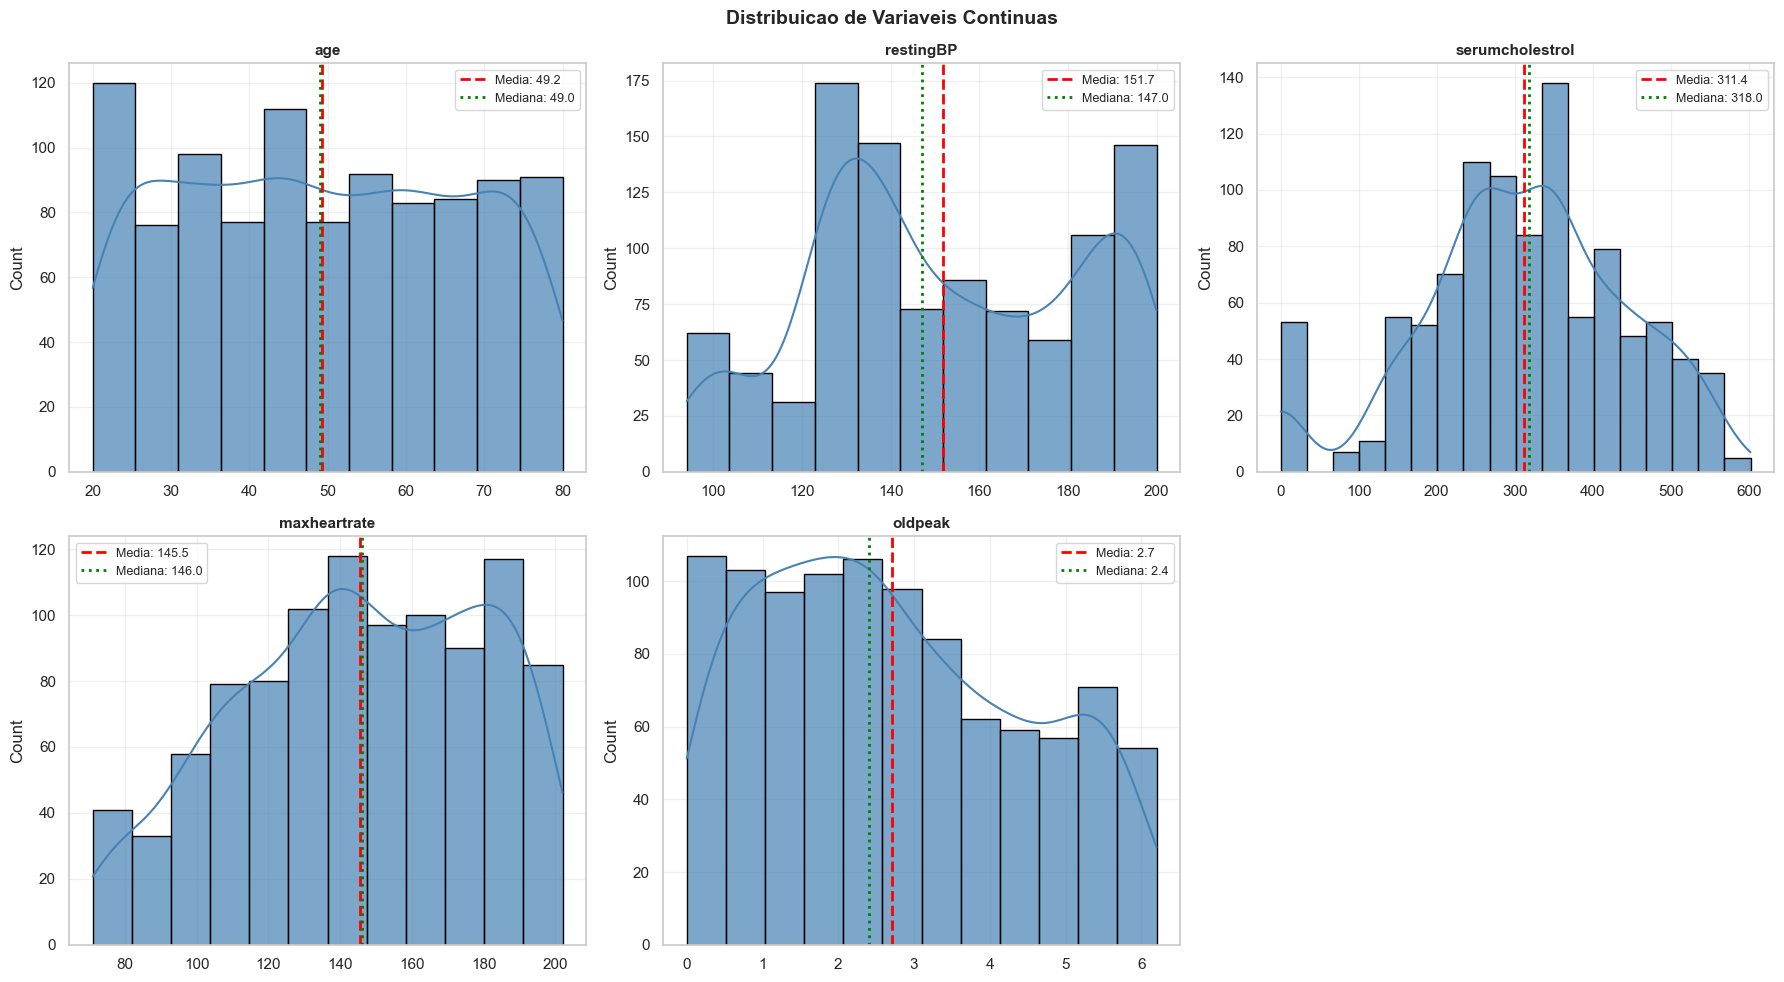

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribuicao de Variaveis Continuas', 
             fontsize=14, fontweight='bold')

axes = axes.ravel()

for idx, col in enumerate(continuous_vars):
    # Histograma + KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], 
                 color='steelblue', edgecolor='black', alpha=0.7)
    
    # Adicionar linhas de referencia (media e mediana)
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                     label=f'Media: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle=':', linewidth=2, 
                     label=f'Mediana: {median_val:.1f}')
    
    # Configuracoes do plot
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

# Remover eixo extra
axes[-1].axis('off')

plt.tight_layout()
plt.show()

#### 📊 Observações das Variáveis Contínuas

**Age (Idade):**
- Distribuição com tendência mais **uniforme (achatada)** do que normal.
- Não há um pico agudo, indicando que o dataset possui uma quantidade muito semelhante de pacientes para cada idade entre 40 e 65 anos.
- Média e mediana praticamente idênticas, reforçando a simetria central da distribuição.


**SerumCholesterol (Colesterol Sérico):**
- A distribuição **tenderia a uma normal**, porém observa-se uma anomalia com **valores zerados ou muito baixos**.
- Valores de 0 mg/dL são fisiologicamente impossíveis, indicando **erro de preenchimento ou dados ausentes** (input error).
- Desconsiderando esses zeros, a curva aparenta ser bem comportada e simétrica.


**Visão Geral das Demais Variáveis:**

*   **RestingBP (Pressão Arterial):** Apresenta um comportamento **multimodal (vários picos)** e irregular, fugindo do padrão normal. Há concentrações específicas em torno de 130 e picos elevados perto de 200, sugerindo grupos distintos de pacientes (normotensos vs. hipertensos graves).
*   **MaxHeartRate e OldPeak:** Ambas apresentam distribuições mais irregulares, sem seguir estritamente a curva gaussiana, refletindo a variabilidade natural das condições cardíacas dos pacientes no dataset.

### Variáveis Discretas

Para as variáveis discretas, foram utilizados gráficos de barras com o objetivo de analisar a distribuição e a proporção de cada categoria no conjunto de dados. Essa visualização permite identificar possíveis desbalanceamentos entre classes e compreender a representatividade de cada categoria.

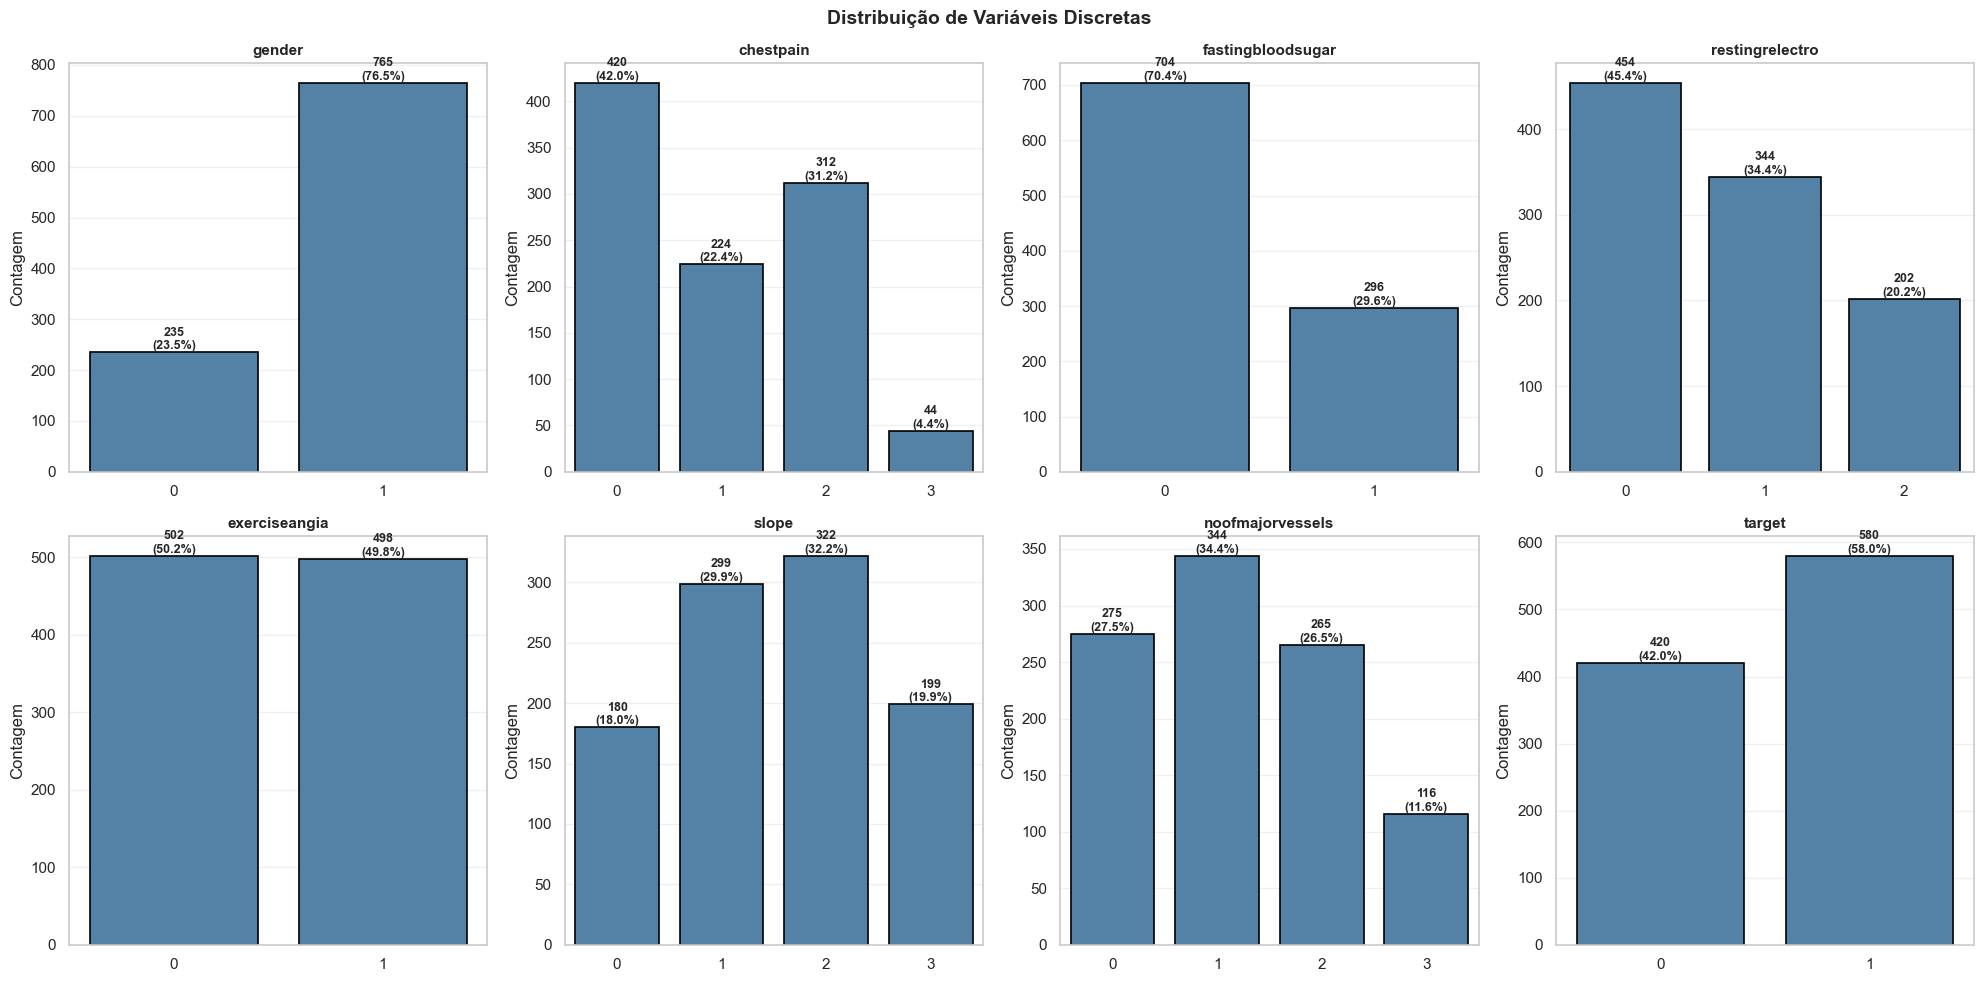

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuição de Variáveis Discretas ', 
             fontsize=14, fontweight='bold')

axes = axes.ravel()

for idx, col in enumerate(discrete_vars):
    # Countplot
    ax = sns.countplot(data=df, x=col, ax=axes[idx], 
                       color='steelblue', edgecolor='black', linewidth=1.2)
    
    
    # Adicionar rotulos de dados (contagem e percentual)
    total = len(df)
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            pct = (height / total) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}\n({pct:.1f}%)',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Configuracoes do plot
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Contagem')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

#### 📊 Observações das Variáveis Discretas

**Desequilíbrios Notáveis:**
- **Gender (Gênero):** Há uma nítida predominância da classe 1 (homens) com **76.5%**, contra apenas 23.5% da classe 0. Este é um viés demográfico importante do dataset.
- **FastingBloodSugar:** 70.4% dos pacientes têm níveis normais (classe 0), indicando que a glicemia elevada é menos frequente na amostra.
- **ChestPain:** O tipo 0 é predominante (42%), enquanto o tipo 3 é muito raro (apenas 4.4%), o que pode dificultar a identificação específica para esta categoria minoritária.

**Variáveis Balanceadas e Bem Comportadas:**
- **ExerciseAngia:** Distribuição praticamente perfeita. Isso é estatisticamente excelente, pois o modelo terá exemplos abundantes de pacientes com e sem angina induzida.
- **Target:** A variável alvo apresenta um equilíbrio saudável (**42% vs 58%**). Embora haja leve predominância de casos positivos (1), não é um desbalanceamento severo que exija técnicas de reamostragem (como SMOTE) de imediato.

**Anomalias e Erros Potenciais:**
- **Slope:** A presença da **categoria 0** (aprox. 18%) é inconsistente. Clinicamente, espera-se apenas 1, 2 ou 3. Isso sugere fortemente que o valor 0 representa **dados ausentes (null)** imputados ou erro de coleta, necessitando tratamento na etapa de limpeza.


## 🎯 Conclusões Consolidadas da Análise Univariada

### 1. Integridade dos Dados e Anomalias (Pontos de Atenção)
A análise revelou inconsistências específicas que **exigem tratamento** na fase de preparação:
- **`slope = 0`:** Representa ~18% dos dados. Como o slope clínico padrão é 1, 2 ou 3, este valor indica **dados ausentes (NULL)** codificados incorretamente.
- **`serumcholesterol = 0`:** Valor fisiologicamente impossível encontrado na distribuição, indicando erro de coleta.
- **`restingBP`:** Distribuição multimodal e irregular com picos elevados, fugindo do padrão normal e exigindo atenção com hipertensão severa vs. erro de medida.

### 2. Padrões de Distribuição
- **`age`:** Distribuição uniforme (platô) entre 40-65 anos, garantindo boa representatividade sem viés de idade central.
- **`oldpeak`:** Assimetria positiva esperada (maioria dos pacientes saudáveis próxima de 0, com cauda longa para casos graves).
- **Viés de Gênero:** Forte predominância do sexo masculino (**76.5%**), o que é um viés demográfico importante a ser considerado na avaliação de justiça do modelo.

### 3. Aptidão para Modelagem
- **Target Balanceado (58% vs 42%):** O dataset apresenta um equilíbrio saudável entre classes, **dispensando técnicas de balanceamento artificial (como SMOTE)** neste momento.
- **Features Robustas:** Variáveis como `exerciseangia` possuem distribuição equilibrada (50/50), sugerindo alto potencial preditivo.

